<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/Logo_UTFSM.png/250px-Logo_UTFSM.png style="float:right;height:90px">
<img src=http://carla2014.ccarla.org/img/logo_DI_UTFSM.jpg style="float:left;height:90px">
<center>
    <h1> Scientific Programming in Python  </h1>
    <h2> Actividad 4 </h2> 
</center>

<center>    
    Roberto Felipe Fuentes Zenteno - `roberto.fuentes@alumnos.usm.cl`.
</center>

In [1]:
import numba
import numpy as np
import numexpr as ne
import matplotlib.pyplot as plt

#librerias extra y que se deben instalar
from tabulate import tabulate
from IPython.display import HTML

En esta actividad implementaremos una conocida métrica para medir disimilitud entre conjuntos: __La métrica de Hausdorff__. Esta corresponde a un métrica o distancia ocupada para medir cuán disímiles son dos subconjuntos dados. 


Esta tiene muchas aplicaciones, en particular para comparar el parecido entre imágenes. En el caso en donde los conjuntos son arreglos bidimensionales, la definición es la siguiente:

Sean $X \in \mathbb{R}^{m \times 3}$ e  $Y \in \mathbb{R}^{n \times 3}$ dos matrices, la métrica/distancia de Hausdorff sobre sobre estas como:

$$
d_H(X,Y) = \max \left(\ \max_{i\leq m} \min_{j \leq n} d(X[i],Y[j]), \ \max_{j\leq n} \min_{i \leq m} d(Y[j],X[i]) \ \right)
$$

donde $d$ es la _distancia Euclideana_ clásica. ($X[i]$ indíca la i-ésima fila de X).

__Ilustración unidimensional:__ Distancia entre funciones.
<img src='data/hausdorff.png' style="width: 600px;">

1. Implemente la métrica de Hausdorff en Python clásico.
2. Implemente la métrica de Hausdorff usando Numba (Forzando el modo __nopython__ y definiendo explícitamente las _signatures_ de las funciones).
3. Cree `10` arreglos $X,Y$ aleatorios, con cantidad creciente de filas, y realice análsis de tiempos de ejecuciones de las funciones anteriores sobre estos arreglos.
4. Concluya.

## Desarrollo

**Nota**: Si se desea ejecutar el laboratorio, favor de instalar previamente _tabular_ para poder mostrar las tablas con los tiempos.

### Implementación python clásico:

In [2]:
def Hausdorff_python(X,Y):
    lista_mayores_1 = []
    lista_mayores_2 = []
    for i in range(X.shape[0]):
        lista_menores_1 = []
        lista_menores_2 = []
        for j in range(Y.shape[0]):
            lista_menores_1.append(np.linalg.norm(X[i,:] - Y[j,:]))
            lista_menores_2.append(np.linalg.norm(X[j,:] - Y[j,:]))
        lista_mayores_1.append(min(lista_menores_1))
        lista_mayores_2.append(min(lista_menores_2))
        del lista_menores_1
        del lista_menores_2
    return max(max(lista_mayores_1), max(lista_mayores_2))

### Implementación python con numba:

In [3]:
signatures = ['float32 (float32[:,:], float32[:,:])', 'float64 (float64[:,:], float64[:,:])']
@numba.jit(signatures, nopython=True)
def Hausdorff_numba(X,Y):
    m1,n1 = X.shape
    m2,n2 = X.shape
    lista_mayores_1 = np.empty(m1)
    lista_mayores_2 = np.empty(m1)
    for i in range(m1):
        lista_menores_1 = np.empty(m1)
        lista_menores_2 = np.empty(m1)
        for j in range(m2):
            norma_1 = np.linalg.norm(X[i,:] - Y[j,:])
            norma_2 = np.linalg.norm(X[j,:] - Y[i,:])
            lista_menores_1[j] = norma_1
            lista_menores_2[j] = norma_1
        lista_mayores_1[i] = lista_menores_1.min()
        lista_mayores_2[i] = lista_menores_2.min()
    max_matrix_1 = lista_mayores_1.max()
    max_matrix_2 = lista_mayores_2.max()
    resultado = max(max_matrix_1,max_matrix_2)
    return resultado

In [4]:
#Experimento 1
X1 = np.random.random((10, 3))
Y1 = np.random.random((5, 3))

#Experimento 1
X1 = np.random.random((10, 3))
Y1 = np.random.random((5, 3))

#### Celda con las matrices que se usaran para el experimento:

In [5]:
#Experimento 1
X1 = np.random.random((100,3))
Y1 = np.random.random((50,3))

#Experimento 2
X2 = np.random.random((200,3))
Y2 = np.random.random((100,3))

#Experimento 3
X3 = np.random.random((300,3))
Y3 = np.random.random((150,3))

#Experimento 4
X4 = np.random.random((400,3))
Y4 = np.random.random((200,3))

#Experimento 5
X5 = np.random.random((500,3))
Y5 = np.random.random((250,3))

#Experimento 6
X6 = np.random.random((600,3))
Y6 = np.random.random((300,3))

#Experimento 7
X7 = np.random.random((700,3))
Y7 = np.random.random((350,3))

#Experimento 8
X8 = np.random.random((800,3))
Y8 = np.random.random((400,3))

#Experimento 9
X9 = np.random.random((900,3))
Y9 = np.random.random((450,3))

#Experimento 10
X10 = np.random.random((1000,3))
Y10 = np.random.random((500,3))

### Experimentos

In [6]:
print("Experimento 1: \n")
naive1 = %timeit -o Hausdorff_python(X1,Y1)
jitted1 = %timeit -o Hausdorff_numba(X1,Y1)
result1 = "{0} times faster \n".format(naive1.best/jitted1.best)

print("\n Experimento 2: \n")
naive2 = %timeit -o Hausdorff_python(X2,Y2)
jitted2 = %timeit -o Hausdorff_numba(X2,Y2)
result2 = "{0} times faster \n".format(naive2.best/jitted2.best)

print("\n Experimento 3: \n")
naive3 = %timeit -o Hausdorff_python(X3,Y3)
jitted3 = %timeit -o Hausdorff_numba(X3,Y3)
result3 = "{0} times faster \n".format(naive3.best/jitted3.best)

print("\n Experimento 4: \n")
naive4 = %timeit -o Hausdorff_python(X4,Y4)
jitted4 = %timeit -o Hausdorff_numba(X4,Y4)
result4 = "{0} times faster \n".format(naive4.best/jitted4.best)

print("\n Experimento 5: \n")
naive5 = %timeit -o Hausdorff_python(X5,Y5)
jitted5 = %timeit -o Hausdorff_numba(X5,Y5)
result5 = "{0} times faster \n".format(naive5.best/jitted5.best)

print("\n Experimento 6: \n")
naive6 = %timeit -o Hausdorff_python(X6,Y6)
jitted6 = %timeit -o Hausdorff_numba(X6,Y6)
result6 = "{0} times faster \n".format(naive6.best/jitted6.best)

print("\n Experimento 7: \n")
naive7 = %timeit -o Hausdorff_python(X7,Y7)
jitted7 = %timeit -o Hausdorff_numba(X7,Y7)
result7 = "{0} times faster \n".format(naive7.best/jitted7.best)

print("\n Experimento 8: \n")
naive8 = %timeit -o Hausdorff_python(X8,Y8)
jitted8 = %timeit -o Hausdorff_numba(X8,Y8)
result8 = "{0} times faster \n".format(naive8.best/jitted8.best)

print("\n Experimento 9: \n")
naive9 = %timeit -o Hausdorff_python(X9,Y9)
jitted9 = %timeit -o Hausdorff_numba(X9,Y9)
result9 = "{0} times faster \n".format(naive9.best/jitted9.best)

print("\n Experimento 10: \n")
naive10 = %timeit -o Hausdorff_python(X10,Y10)
jitted10 = %timeit -o Hausdorff_numba(X10,Y10)
result10 = "{0} times faster \n".format(naive10.best/jitted10.best)

sub_experimento_1 = [naive1,jitted1,result1]
sub_experimento_2 = [naive2,jitted2,result2]
sub_experimento_3 = [naive3,jitted3,result3]
sub_experimento_4 = [naive4,jitted4,result4]
sub_experimento_5 = [naive5,jitted5,result5]
sub_experimento_6 = [naive6,jitted6,result6]
sub_experimento_7 = [naive7,jitted7,result7]
sub_experimento_8 = [naive8,jitted8,result8]
sub_experimento_9 = [naive9,jitted9,result9]
sub_experimento_10 = [naive10,jitted10,result10]

Experimento 1: 

54.5 ms ± 794 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
8.49 ms ± 205 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

 Experimento 2: 

227 ms ± 7.08 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
34.2 ms ± 519 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

 Experimento 3: 

561 ms ± 74.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
79 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

 Experimento 4: 

894 ms ± 17.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
133 ms ± 4.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

 Experimento 5: 

1.42 s ± 207 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
213 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

 Experimento 6: 

1.85 s ± 38.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
369 ms ± 6.93 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

 Experimento 7: 

2.47 s ± 24.5 ms per loop (mean ± std. dev. 

In [7]:
data = [[str(round(sub_experimento_1[0].best*1e3))+(" milliseconds"),str(round(sub_experimento_1[1].best*1e3))+(" milliseconds"),sub_experimento_1[2]],
        [str(round(sub_experimento_2[0].best*1e3))+(" milliseconds"),str(round(sub_experimento_2[1].best*1e3))+(" milliseconds"),sub_experimento_2[2]],
        [str(round(sub_experimento_3[0].best*1e3))+(" milliseconds"),str(round(sub_experimento_3[1].best*1e3))+(" milliseconds"),sub_experimento_3[2]],
        [str(round(sub_experimento_4[0].best*1e3))+(" milliseconds"),str(round(sub_experimento_4[1].best*1e3))+(" milliseconds"),sub_experimento_4[2]],
        [str(round(sub_experimento_5[0].best*1e3))+(" milliseconds"),str(round(sub_experimento_5[1].best*1e3))+(" milliseconds"),sub_experimento_5[2]],
        [str(round(sub_experimento_6[0].best*1e3))+(" milliseconds"),str(round(sub_experimento_6[1].best*1e3))+(" milliseconds"),sub_experimento_6[2]],
        [str(round(sub_experimento_7[0].best*1e3))+(" milliseconds"),str(round(sub_experimento_7[1].best*1e3))+(" milliseconds"),sub_experimento_7[2]],
        [str(round(sub_experimento_8[0].best*1e3))+(" milliseconds"),str(round(sub_experimento_8[1].best*1e3))+(" milliseconds"),sub_experimento_8[2]],
        [str(round(sub_experimento_9[0].best*1e3))+(" milliseconds"),str(round(sub_experimento_9[1].best*1e3))+(" milliseconds"),sub_experimento_9[2]],
        [str(round(sub_experimento_10[0].best*1e3))+(" milliseconds"),str(round(sub_experimento_10[1].best*1e3))+(" milliseconds"),sub_experimento_10[2]]]
HTML(tabulate(data, headers= ['mejor tiempo python', 'mejor tiempo numba', 'veces mas rapido entre python y numba '], floatfmt='.3e', tablefmt='html'))

mejor tiempo python,mejor tiempo numba,veces mas rapido entre python y numba
53 milliseconds,8 milliseconds,6.516356919229249 times faster
217 milliseconds,33 milliseconds,6.49152231148003 times faster
480 milliseconds,77 milliseconds,6.216498610536273 times faster
862 milliseconds,129 milliseconds,6.692410875992727 times faster
1287 milliseconds,211 milliseconds,6.101703832264809 times faster
1804 milliseconds,360 milliseconds,5.016520890209839 times faster
2442 milliseconds,426 milliseconds,5.728186074797846 times faster
3224 milliseconds,509 milliseconds,6.339450102498689 times faster
4061 milliseconds,714 milliseconds,5.6891167890815195 times faster
5038 milliseconds,789 milliseconds,6.384109086493008 times faster


Podemos observar claramente que a medida que aumenta el tamaño de las filas en cada experimento, ambos algoritmos van en crecimiento en sus tiempos, aunque claramente la función con _numba_ siempre le gana por mucho a _python_ (es aproximadamente 6 veces mas rapido la función con numbda que con python), tomando como supuesto que se comparan los mejores tiempos de cada algoritmo. Para apreciarlo mejor, haremos un gráfico del tamaño de filas vs los tiempos de cada algoritmo:

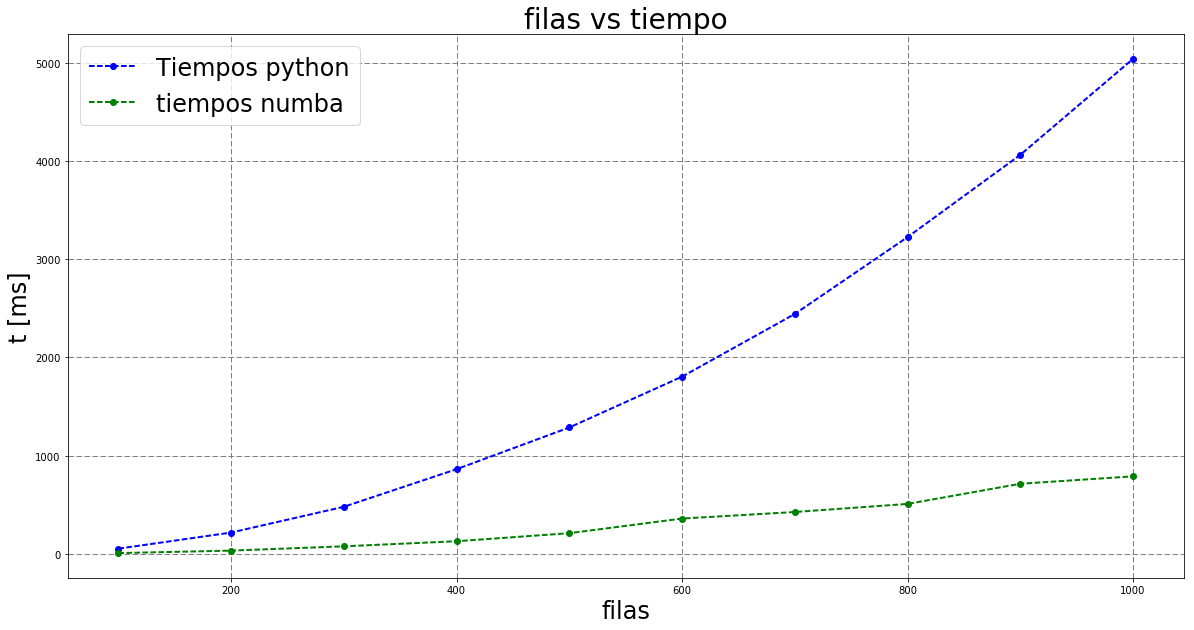

In [8]:
filas = list(range(100,1100,100))
exp_python = [sub_experimento_1[0].best*1e3,
              sub_experimento_2[0].best*1e3,
              sub_experimento_3[0].best*1e3,
              sub_experimento_4[0].best*1e3,
              sub_experimento_5[0].best*1e3,
              sub_experimento_6[0].best*1e3,
              sub_experimento_7[0].best*1e3,
              sub_experimento_8[0].best*1e3,
              sub_experimento_9[0].best*1e3,
              sub_experimento_10[0].best*1e3]

exp_numba = [sub_experimento_1[1].best*1e3,
              sub_experimento_2[1].best*1e3,
              sub_experimento_3[1].best*1e3,
              sub_experimento_4[1].best*1e3,
              sub_experimento_5[1].best*1e3,
              sub_experimento_6[1].best*1e3,
              sub_experimento_7[1].best*1e3,
              sub_experimento_8[1].best*1e3,
              sub_experimento_9[1].best*1e3,
              sub_experimento_10[1].best*1e3]

plt.figure(figsize=(20,10))
plt.plot(filas, exp_python, '--bo', linewidth = 2, label = 'Tiempos python')
plt.plot(filas, exp_numba,'--go', linewidth = 2, label = 'tiempos numba')
plt.legend(loc = 2,prop={'size':24})
plt.xlabel("filas", fontsize = 24)
plt.ylabel("t [ms]", fontsize = 24)
plt.grid(True)
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
plt.axis('tight')
plt.title("filas vs tiempo",fontsize = 28, verticalalignment = 'baseline', horizontalalignment = 'center')
plt.show()

Observamos claramente que los tiempos en python se disparan en comparación a los de numba, por lo que concluimos que la utilización de numba optimiza de forma considerable el tiempo de nuestro algoritmo.